In [1]:
import networkx as nx
import numpy as np
import matplotlib
import scipy
import warnings
warnings.filterwarnings('ignore')
import time
import os

In [23]:
file_name="/home/wasiyi/edges.txt"
g=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g.order(),g.size()
print("No. of nodes are=",node)
print("No. of edges are=",edge)

No. of nodes are= 37700
No. of edges are= 289003


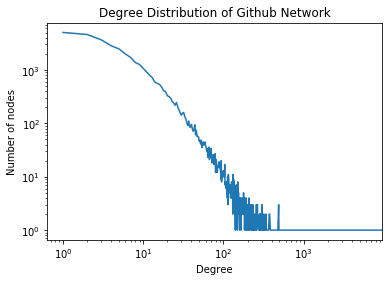

CPU times: user 927 ms, sys: 6.99 ms, total: 934 ms
Wall time: 943 ms


In [28]:
%%time
import matplotlib.pyplot as plt
#degree distribution
deg=g.degree()
d=list(np.zeros((node), dtype=np.int))
tmp=list(np.zeros((node), dtype=np.int))
for i in range (node):
    d[i]= deg[i]
for i in range (node):
    tmp[i]=i
degList=dict(list(zip(tmp,d)))

deg_values = sorted(set(degList.values()))
deg_hist = [list(degList.values()).count(x) for x in deg_values]

fig=plt.figure()
plt.loglog(deg_values, deg_hist) 
plt.xlim([0, max(degList.values())])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree Distribution of Github Network')

plt.show()
fig.savefig('/home/wasiyi/dd_github.png')
plt.close()

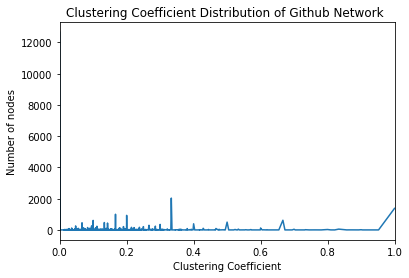

Average Clusterng Coefficient= 0.1675370448010758
CPU times: user 29.6 s, sys: 19.2 ms, total: 29.6 s
Wall time: 29.9 s


In [25]:
%%time
#clustering coefficient
clc=nx.clustering(g)
clc_values = sorted(set(clc.values()))
clc_hist = [list(clc.values()).count(x) for x in clc_values]

plt.figure()
plt.plot(clc_values, clc_hist)
plt.xlim([0, 1])
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of nodes')
plt.title('Clustering Coefficient Distribution of Github Network ')
plt.xlim([0, 1])
plt.show()
fig.plt.savefig('/home/wasiyi/cc_github.png')
plt.close()

print ("Average Clusterng Coefficient=",np.mean(list(clc.values())))

In [4]:
%%time
import community
#partition network using greedy approach. Note the number of communities
G = nx.read_gml("/home/wasiyi/github_graph_1.gml")
partition = community.best_partition(G)
g1=G
for i in g1.nodes():
    g1.nodes[i]['community'] = partition[i]
nx.write_gml(g1, "/home/wasiyi/comm_github.gml")

CPU times: user 1min 16s, sys: 548 ms, total: 1min 17s
Wall time: 1min 18s
